<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/K_Means_Algorithm_Implimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data= make_blobs(n_samples=200,n_features=2,centers=4)

In [4]:
data[1]

array([1, 3, 3, 0, 0, 2, 2, 3, 1, 3, 0, 0, 2, 0, 1, 2, 3, 3, 3, 1, 0, 2,
       3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3, 0, 2, 0, 1, 1, 3, 2, 2,
       3, 2, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 2, 1, 1, 3, 2, 0, 1, 2, 3,
       1, 0, 0, 0, 1, 1, 1, 0, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 1, 0, 3, 0,
       0, 3, 3, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 3, 2, 1, 0,
       2, 0, 1, 3, 3, 0, 0, 0, 1, 1, 2, 3, 0, 3, 3, 1, 3, 0, 0, 2, 1, 2,
       0, 2, 3, 0, 2, 0, 3, 2, 2, 1, 3, 3, 3, 1, 3, 1, 0, 0, 0, 3, 2, 1,
       1, 3, 3, 3, 0, 0, 2, 2, 1, 3, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 1,
       2, 2])

In [11]:
data[0]

array([[ 6.05929907e+00,  6.47508987e+00],
       [-6.59535158e+00,  5.07756848e+00],
       [-6.23924402e+00,  5.25257186e+00],
       [ 5.05376162e-01, -5.23840434e+00],
       [-1.65441746e-01, -4.02073186e+00],
       [-9.97893823e-01, -2.22259591e+00],
       [-2.39860211e-01, -1.40978589e+00],
       [-7.02390001e+00,  4.94271618e+00],
       [ 6.26348755e+00,  6.23994352e+00],
       [-7.34396212e+00,  4.58991760e+00],
       [ 6.80098990e-01, -3.39658745e+00],
       [ 3.00824733e+00, -3.61546288e+00],
       [-4.67947744e-01, -4.00585939e+00],
       [ 1.24779872e+00, -4.96841103e+00],
       [ 5.49874852e+00,  6.54157153e+00],
       [-5.52922464e-01, -3.30453393e+00],
       [-6.59059133e+00,  6.64343311e+00],
       [-5.91418837e+00,  6.28997724e+00],
       [-6.54397657e+00,  3.16673896e+00],
       [ 6.05528429e+00,  7.74350202e+00],
       [ 2.02346955e-01, -2.52329022e+00],
       [ 2.91759569e-01, -1.76228850e+00],
       [-7.28539621e+00,  3.96853601e+00],
       [-6.

In [14]:
data[0].shape

(200, 2)

In [13]:
data[1].shape

(200,)

# Visualise the Data


In [15]:
data[0][:,0] # all the rows in first column

array([ 6.05929907e+00, -6.59535158e+00, -6.23924402e+00,  5.05376162e-01,
       -1.65441746e-01, -9.97893823e-01, -2.39860211e-01, -7.02390001e+00,
        6.26348755e+00, -7.34396212e+00,  6.80098990e-01,  3.00824733e+00,
       -4.67947744e-01,  1.24779872e+00,  5.49874852e+00, -5.52922464e-01,
       -6.59059133e+00, -5.91418837e+00, -6.54397657e+00,  6.05528429e+00,
        2.02346955e-01,  2.91759569e-01, -7.28539621e+00, -6.99851299e+00,
       -5.82206100e+00, -6.99812033e+00, -7.31681104e+00, -6.15943253e+00,
        5.02220053e+00, -1.25501015e+00,  5.18858202e+00, -2.15777342e-01,
       -7.04500548e+00, -6.96386982e+00, -6.35429714e-01, -5.56145620e+00,
        1.44392719e+00, -1.28961015e+00,  8.79135553e-01,  4.27369357e+00,
        5.04114317e+00, -5.30803450e+00,  1.28651318e-01, -9.04241884e-01,
       -6.57243341e+00, -1.84571871e+00,  6.84500723e-01, -3.00832639e+00,
        1.02613529e+00, -9.44576758e-01, -1.76360780e-01, -2.57126677e-01,
       -3.97883434e-01, -

In [16]:
data[0][:,1] # all the rows in the second colum

array([ 6.47508987,  5.07756848,  5.25257186, -5.23840434, -4.02073186,
       -2.22259591, -1.40978589,  4.94271618,  6.23994352,  4.5899176 ,
       -3.39658745, -3.61546288, -4.00585939, -4.96841103,  6.54157153,
       -3.30453393,  6.64343311,  6.28997724,  3.16673896,  7.74350202,
       -2.52329022, -1.7622885 ,  3.96853601,  4.19777547,  4.51906418,
        4.63190864,  5.37306796,  5.11467859,  6.2288084 , -1.78342808,
        6.13240763, -1.00488165,  4.97295668,  6.52041927, -0.30638211,
        5.09477755, -2.63182737, -1.42890485, -3.76011351,  6.31173161,
        5.88129842,  4.79775262, -2.2756163 , -0.77654391,  5.83363615,
       -1.34525013, -0.67776823, -2.4131578 , -4.42010089, -5.11066367,
       -1.60755315, -4.66901852, -3.29872396,  4.00930942, -3.15869677,
       -5.03310391, -1.74512882, -0.98866211,  6.48623721,  6.8094722 ,
        5.66522826, -2.32334977, -5.61000426,  7.07981784, -1.09052659,
        5.50820281,  6.63035034, -2.71411955, -3.25485972, -5.57

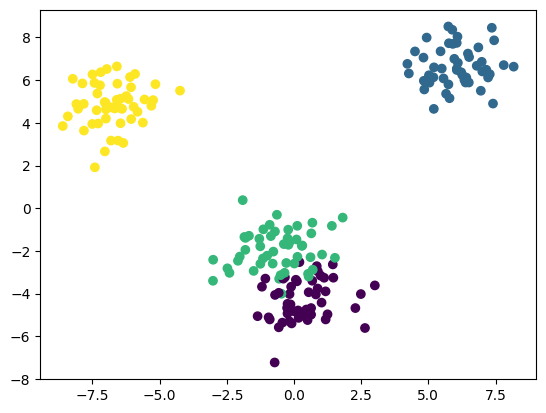

In [10]:
plt.scatter(data[0][:,0],data[0][:,1],c= data[1])

# Creating the clusters

In [17]:
from sklearn.cluster import KMeans

In [18]:
model= KMeans(n_clusters=4)

In [19]:
model.fit(data[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [20]:
model.cluster_centers_

array([[-6.76614373,  4.8407365 ],
       [ 0.39131597, -4.22627002],
       [ 6.03985089,  6.61919636],
       [-0.72506135, -1.83917123]])

In [21]:
model.labels_ # predicted

array([2, 0, 0, 1, 1, 3, 3, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 3, 3,
       0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 3, 0, 1, 3, 1, 2, 2, 0, 3, 3,
       0, 3, 3, 3, 1, 1, 3, 1, 1, 0, 1, 1, 3, 3, 2, 2, 0, 1, 1, 2, 3, 0,
       2, 1, 1, 1, 2, 2, 2, 1, 0, 3, 2, 2, 3, 0, 2, 2, 2, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 2, 1, 3, 2, 1, 0, 3, 2, 1,
       3, 1, 2, 0, 0, 1, 1, 1, 2, 2, 3, 0, 1, 0, 0, 2, 0, 1, 1, 3, 2, 3,
       1, 1, 0, 1, 3, 1, 0, 3, 3, 2, 0, 0, 0, 2, 0, 2, 3, 1, 1, 0, 3, 2,
       2, 0, 0, 0, 1, 1, 3, 3, 2, 0, 1, 1, 3, 2, 2, 1, 2, 2, 3, 3, 1, 0,
       0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 2, 2, 3, 3, 2, 3, 3, 0, 3, 0, 3, 2,
       3, 3], dtype=int32)

In [22]:
 data[1] # orginal values

array([1, 3, 3, 0, 0, 2, 2, 3, 1, 3, 0, 0, 2, 0, 1, 2, 3, 3, 3, 1, 0, 2,
       3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3, 0, 2, 0, 1, 1, 3, 2, 2,
       3, 2, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 2, 1, 1, 3, 2, 0, 1, 2, 3,
       1, 0, 0, 0, 1, 1, 1, 0, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 1, 0, 3, 0,
       0, 3, 3, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 3, 2, 1, 0,
       2, 0, 1, 3, 3, 0, 0, 0, 1, 1, 2, 3, 0, 3, 3, 1, 3, 0, 0, 2, 1, 2,
       0, 2, 3, 0, 2, 0, 3, 2, 2, 1, 3, 3, 3, 1, 3, 1, 0, 0, 0, 3, 2, 1,
       1, 3, 3, 3, 0, 0, 2, 2, 1, 3, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 1,
       2, 2])

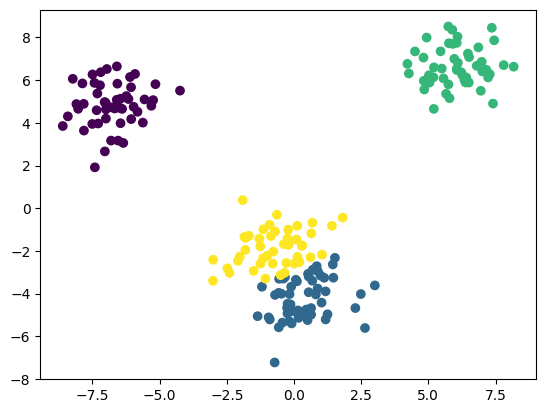

In [25]:
plt.scatter(data[0][:,0],data[0][:,1],c=model.labels_)

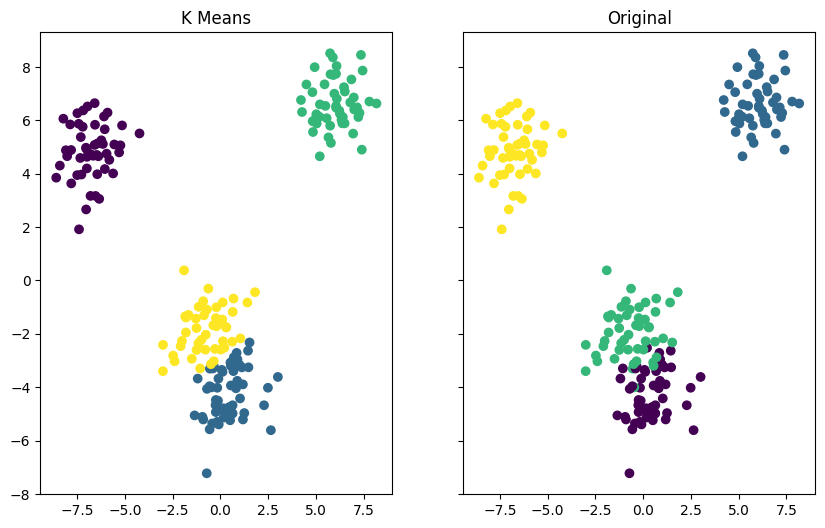

In [27]:

f, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize= (10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c = model.labels_ )
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c = data[1] )